
# Project 3: Classifying Spotify Songs | Will I like this Song?
In this project, I had the opportunty to carry out the following tasks:
- Scrapped Spotify Song Data for multiple playlists
- Built a dataset out of the extracted information
- Evaluated multiple models for classification tasks
- Performed hyperparameter tunning, grid search and cross validation to select the best model available 

In [15]:
#To begin with, we load the dataset created with the data I scrapped from Spotify's API
import pandas as pd
import seaborn as sns
resulting_metrics = pd.DataFrame()
df = pd.read_csv('SpotifyMexScored.csv')
df.head()

,cancion,artista,playlist,track_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,Lista Rep,liked
0,Immortal Rites,Morbid Angel,4tszLL7NTfLCoIz39Zsiy1,5hmek3mrSYvfSElBsPNbxo,0.190,0.934,1,-7.796,0.0560,0.000008,0.107,0.3630,0.360,Death Metal,1
1,Chopped in Half,Obituary,4tszLL7NTfLCoIz39Zsiy1,01cGujYWGF7JchJLSgf6Ta,0.257,0.989,10,-5.918,0.0867,0.000007,0.521,0.2630,0.385,Death Metal,1
2,Left Hand Path,Entombed,4tszLL7NTfLCoIz39Zsiy1,5faD0zZ9fMa3J5ZN3lIWtp,0.166,0.927,7,-8.797,0.0736,0.000004,0.651,0.3440,0.219,Death Metal,1
3,Pull the Plug,Death,4tszLL7NTfLCoIz39Zsiy1,2l0h4aBFLp9HdoaNdCTlbW,0.226,0.978,9,-5.729,0.2090,0.000004,0.533,0.0436,0.242,Death Metal,1
4,Into The Grave,Grave,4tszLL7NTfLCoIz39Zsiy1,4bAIIhqJeOTDcyeo1GvIMo,0.295,0.915,1,-6.968,0.0954,0.000003,0.910,0.0772,0.343,Death Metal,1


In [16]:
#And then define which are the numeric columns which will be used in subsequent steps
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

X = df[['danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence']]
y = df['liked']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [17]:
#Afterward, the normalization preprocessing step is packed into a processing pipeline (this was not neccessary as all features are numeric, but still wanted to give it a try)
numerical_columns = ['danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence']
transformations = [('numerical', StandardScaler(), numerical_columns)]
column_transformer = ColumnTransformer(transformers=transformations,remainder='passthrough')

In [18]:
#Transformations are done
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [19]:
#Since multiple models using multiple parameters & folds will be evaluated, we call sklern's GridSearchCV as well as evaluation tools for classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


{'kernel': 'rbf'}
{'mean_fit_time': array([0.00809968, 0.00930007, 0.00899894]), 'std_fit_time': array([0.00157899, 0.00148609, 0.00118255]), 'mean_score_time': array([0.00100088, 0.00130005, 0.00210032]), 'std_score_time': array([7.23159356e-07, 4.57820104e-04, 8.32990544e-04]), 'param_kernel': masked_array(data=['linear', 'poly', 'rbf'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'kernel': 'linear'}, {'kernel': 'poly'}, {'kernel': 'rbf'}], 'split0_test_score': array([0.94285714, 0.92857143, 0.94285714]), 'split1_test_score': array([0.91428571, 0.92857143, 0.95714286]), 'split2_test_score': array([0.94285714, 0.91428571, 0.98571429]), 'split3_test_score': array([0.91428571, 0.87142857, 0.92857143]), 'split4_test_score': array([0.91428571, 0.97142857, 0.92857143]), 'split5_test_score': array([0.88405797, 0.86956522, 0.89855072]), 'split6_test_score': array([0.94202899, 0.89855072, 0.95652174]), 'split7_test_score': array([0.95

C:\Users\Ivan\AppData\Local\Temp\ipykernel_19668\2893881856.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resulting_metrics= resulting_metrics.append(pd.DataFrame(grid.cv_results_))


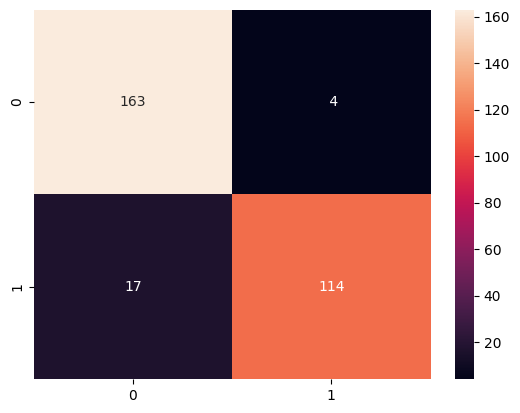

In [20]:
#We define a support vector machine model 

#SVM 
from sklearn.svm import SVC
model = SVC()
params = {
    'kernel' : ['linear', 'poly', 'rbf']
}
grid = GridSearchCV(estimator=model,param_grid=params, cv=10,n_jobs=-1)
# fitting the model for grid search 
grid.fit(X_train_transformed, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
y_pred = grid.predict(X_test_transformed) 

#get scores
print(grid.cv_results_) 
   
# print classification report 
print(classification_report(y_test, y_pred))

#print confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2g')

#Append scores to resulting metrics
resulting_metrics= resulting_metrics.append(pd.DataFrame(grid.cv_results_))

{'criterion': 'gini', 'n_estimators': 100}
{'mean_fit_time': array([0.09609971, 0.19450028, 0.11519992, 0.21059828]), 'std_fit_time': array([0.00211901, 0.00736503, 0.00536299, 0.01506822]), 'mean_score_time': array([0.00640042, 0.01169982, 0.00630023, 0.00839951]), 'std_score_time': array([0.0012001 , 0.00100471, 0.00090018, 0.00210766]), 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'gini', 'n_estimators': 50}, {'criterion': 'gini', 'n_estimators': 100}, {'criterion': 'entropy', 'n_estimators': 50}, {'criterion': 'entropy', 'n_estimators': 100}], 'split0_test_score': array([0.95714286, 0.95714286, 0.97142857, 0.97142857]), 'split1_test_score': array([0.94285714, 0.95714286, 0.9

C:\Users\Ivan\AppData\Local\Temp\ipykernel_19668\17406782.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resulting_metrics= resulting_metrics.append(pd.DataFrame(grid.cv_results_))


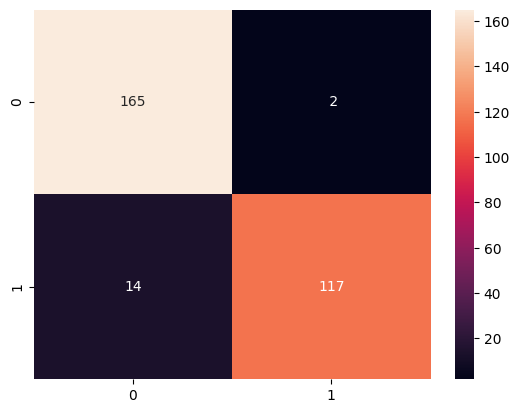

In [21]:
#We define a support random forest model 

#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params = {
    'n_estimators': [50,100],
    'criterion':['gini','entropy']
}
grid = GridSearchCV(estimator=model,param_grid=params, cv=10,n_jobs=-1)
# fitting the model for grid search 
grid.fit(X_train_transformed, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
y_pred = grid.predict(X_test_transformed) 

#get scores
print(grid.cv_results_) 
   
# print classification report 
print(classification_report(y_test, y_pred))

#print confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2g')

#Append scores to resulting metrics
resulting_metrics= resulting_metrics.append(pd.DataFrame(grid.cv_results_))

{'n_estimators': 100}
{'mean_fit_time': array([0.09449832, 0.17289898]), 'std_fit_time': array([0.00387905, 0.01046426]), 'mean_score_time': array([0.00150075, 0.0003    ]), 'std_score_time': array([0.00149984, 0.00045826]), 'param_n_estimators': masked_array(data=[50, 100],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 50}, {'n_estimators': 100}], 'split0_test_score': array([0.95714286, 0.97142857]), 'split1_test_score': array([0.94285714, 0.92857143]), 'split2_test_score': array([0.95714286, 0.95714286]), 'split3_test_score': array([0.92857143, 0.92857143]), 'split4_test_score': array([0.97142857, 0.95714286]), 'split5_test_score': array([0.91304348, 0.91304348]), 'split6_test_score': array([0.92753623, 0.94202899]), 'split7_test_score': array([0.94202899, 0.94202899]), 'split8_test_score': array([0.92753623, 0.92753623]), 'split9_test_score': array([0.91304348, 0.95652174]), 'mean_test_score': array([0.93803313, 0.942

C:\Users\Ivan\AppData\Local\Temp\ipykernel_19668\2838689283.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resulting_metrics= resulting_metrics.append(pd.DataFrame(grid.cv_results_))


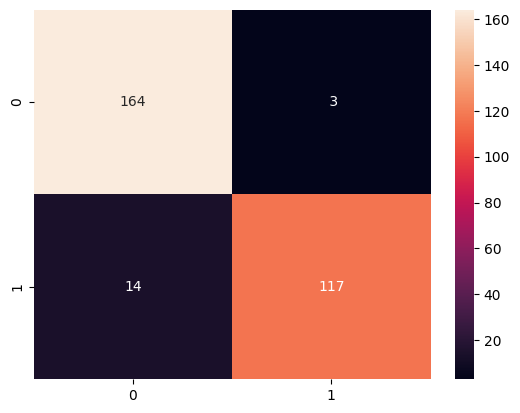

In [22]:
#We define a GBT model 

#Gradient Boosted trees
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
params = {
    'n_estimators': [50,100],
}
grid = GridSearchCV(estimator=model,param_grid=params, cv=10,n_jobs=-1)
# fitting the model for grid search 
grid.fit(X_train_transformed, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
y_pred = grid.predict(X_test_transformed) 

#get scores
print(grid.cv_results_) 
   
# print classification report 
print(classification_report(y_test, y_pred))

#print confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2g')


#Append scores to resulting metrics
resulting_metrics= resulting_metrics.append(pd.DataFrame(grid.cv_results_))

{}
{'mean_fit_time': array([0.12739861]), 'std_fit_time': array([0.00514207]), 'mean_score_time': array([0.00200021]), 'std_score_time': array([0.00063256]), 'params': [{}], 'split0_test_score': array([0.97142857]), 'split1_test_score': array([0.92857143]), 'split2_test_score': array([0.97142857]), 'split3_test_score': array([0.92857143]), 'split4_test_score': array([0.97142857]), 'split5_test_score': array([0.91304348]), 'split6_test_score': array([0.95652174]), 'split7_test_score': array([0.91304348]), 'split8_test_score': array([0.91304348]), 'split9_test_score': array([0.95652174]), 'mean_test_score': array([0.94236025]), 'std_test_score': array([0.02427896]), 'rank_test_score': array([1])}
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       167
           1       0.98      0.90      0.94       131

    accuracy                           0.95       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.95 

C:\Users\Ivan\AppData\Local\Temp\ipykernel_19668\3973816258.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resulting_metrics= resulting_metrics.append(pd.DataFrame(grid.cv_results_))


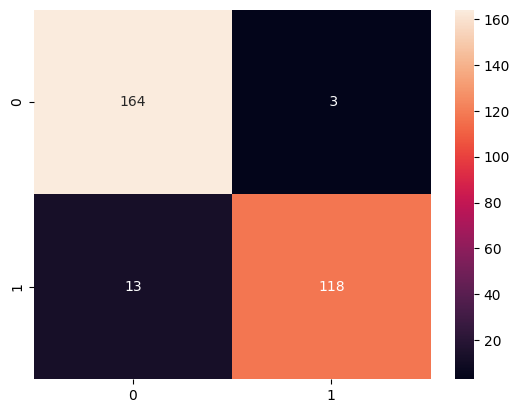

In [23]:
#We define an XGBoost model 


#XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
params = {
}
grid = GridSearchCV(estimator=model,param_grid=params, cv=10,n_jobs=-1)
# fitting the model for grid search 
grid.fit(X_train_transformed, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
y_pred = grid.predict(X_test_transformed) 

#get scores
print(grid.cv_results_) 
   
# print classification report 
print(classification_report(y_test, y_pred))

#print confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2g')

#Append scores to resulting metrics
resulting_metrics= resulting_metrics.append(pd.DataFrame(grid.cv_results_))

In [24]:
#And then tget all metrics from all models to compare
resulting_metrics['params'] = resulting_metrics['params'].apply(lambda x: str(x))
copy = resulting_metrics
copy.index = copy['params']
copy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,param_criterion,param_n_estimators
params,,,,,,,,,,,,,,,,,,,,,
{'kernel': 'linear'},0.008100,0.001579,0.001001,7.231594e-07,linear,{'kernel': 'linear'},0.942857,0.914286,0.942857,0.914286,...,0.884058,0.942029,0.956522,0.884058,0.913043,0.920828,0.023637,2,NaN,NaN
{'kernel': 'poly'},0.009300,0.001486,0.001300,4.578201e-04,poly,{'kernel': 'poly'},0.928571,0.928571,0.914286,0.871429,...,0.869565,0.898551,0.942029,0.840580,0.869565,0.903458,0.038454,3,NaN,NaN
{'kernel': 'rbf'},0.008999,0.001183,0.002100,8.329905e-04,rbf,{'kernel': 'rbf'},0.942857,0.957143,0.985714,0.928571,...,0.898551,0.956522,0.942029,0.884058,0.927536,0.935155,0.027746,1,NaN,NaN
"{'criterion': 'gini', 'n_estimators': 50}",0.096100,0.002119,0.006400,1.200096e-03,NaN,"{'criterion': 'gini', 'n_estimators': 50}",0.957143,0.942857,0.957143,0.928571,...,0.913043,0.956522,0.927536,0.898551,0.942029,0.936625,0.018703,4,gini,50
"{'criterion': 'gini', 'n_estimators': 100}",0.194500,0.007365,0.011700,1.004711e-03,NaN,"{'criterion': 'gini', 'n_estimators': 100}",0.957143,0.957143,0.971429,0.928571,...,0.913043,0.956522,0.927536,0.898551,0.956522,0.943789,0.023867,1,gini,100
"{'criterion': 'entropy', 'n_estimators': 50}",0.115200,0.005363,0.006300,9.001816e-04,NaN,"{'criterion': 'entropy', 'n_estimators': 50}",0.971429,0.928571,0.957143,0.928571,...,0.898551,0.956522,0.942029,0.927536,0.927536,0.942360,0.024254,2,entropy,50
"{'criterion': 'entropy', 'n_estimators': 100}",0.210598,0.015068,0.008400,2.107657e-03,NaN,"{'criterion': 'entropy', 'n_estimators': 100}",0.971429,0.942857,0.957143,0.914286,...,0.913043,0.971014,0.927536,0.913043,0.913043,0.939482,0.024967,3,entropy,100
{'n_estimators': 50},0.094498,0.003879,0.001501,1.499844e-03,NaN,{'n_estimators': 50},0.957143,0.942857,0.957143,0.928571,...,0.913043,0.927536,0.942029,0.927536,0.913043,0.938033,0.018557,2,NaN,50
{'n_estimators': 100},0.172899,0.010464,0.000300,4.582608e-04,NaN,{'n_estimators': 100},0.971429,0.928571,0.957143,0.928571,...,0.913043,0.942029,0.942029,0.927536,0.956522,0.942402,0.017153,1,NaN,100


In [25]:
#We do some adjustments to the metrics dataframe
copy = copy[['split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score']]
copy = copy.T
copy

params,{'kernel': 'linear'},{'kernel': 'poly'},{'kernel': 'rbf'},"{'criterion': 'gini', 'n_estimators': 50}","{'criterion': 'gini', 'n_estimators': 100}","{'criterion': 'entropy', 'n_estimators': 50}","{'criterion': 'entropy', 'n_estimators': 100}",{'n_estimators': 50},{'n_estimators': 100},{}
split1_test_score,0.914286,0.928571,0.957143,0.942857,0.957143,0.928571,0.942857,0.942857,0.928571,0.928571
split2_test_score,0.942857,0.914286,0.985714,0.957143,0.971429,0.957143,0.957143,0.957143,0.957143,0.971429
split3_test_score,0.914286,0.871429,0.928571,0.928571,0.928571,0.928571,0.914286,0.928571,0.928571,0.928571
split4_test_score,0.914286,0.971429,0.928571,0.942857,0.971429,0.985714,0.971429,0.971429,0.957143,0.971429
split5_test_score,0.884058,0.869565,0.898551,0.913043,0.913043,0.898551,0.913043,0.913043,0.913043,0.913043
split6_test_score,0.942029,0.898551,0.956522,0.956522,0.956522,0.956522,0.971014,0.927536,0.942029,0.956522
split7_test_score,0.956522,0.942029,0.942029,0.927536,0.927536,0.942029,0.927536,0.942029,0.942029,0.913043
split8_test_score,0.884058,0.840580,0.884058,0.898551,0.898551,0.927536,0.913043,0.927536,0.927536,0.913043
split9_test_score,0.913043,0.869565,0.927536,0.942029,0.956522,0.927536,0.913043,0.913043,0.956522,0.956522


<AxesSubplot:xlabel='params'>

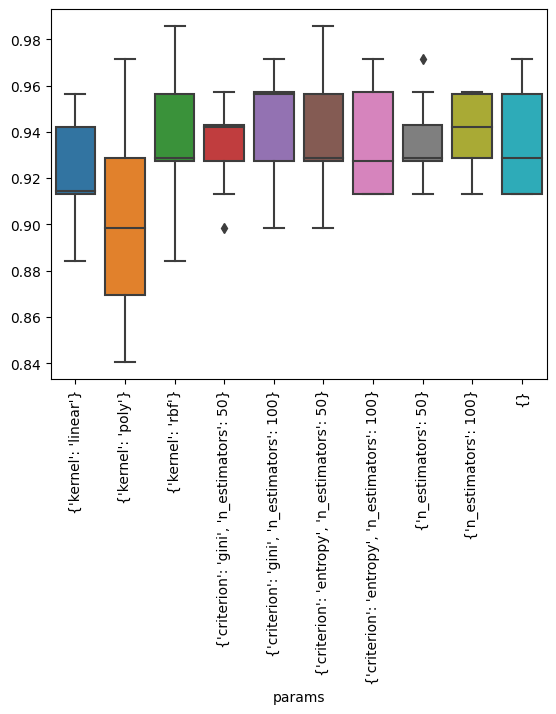

In [27]:
#And visualize the results

#It seems the XGBoost model would be a good candidate as its accuracy never goes below 91%, and did get up to 97% for some folds
import matplotlib.pylab as plt
plt.tick_params(axis='x', rotation=90)
sns.boxplot(data=copy)